In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


CLEANING

In [ ]:

df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [ ]:
df.columns.values.tolist()

['Brand',
 'Model',
 'AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro',
 'inr(10e3)']

In [ ]:
df.shape

(103, 15)

In [ ]:
df.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.936
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.808


ANALYSIS OF DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 12.2+ KB


In [ ]:
#FINDING NULL VALUES
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

In [ ]:
#STATISTICS
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,0.951456,4.883495,55811.563107,4643.522050
std,3.017430,43.573030,126.014444,29.566839,0.215963,0.795834,34134.665280,2840.004151
min,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,20129.000000,1674.732800
25%,5.100000,150.000000,250.000000,168.000000,1.000000,5.000000,34429.500000,2864.534400
50%,7.300000,160.000000,340.000000,180.000000,1.000000,5.000000,45000.000000,3744.000000
75%,9.000000,200.000000,400.000000,203.000000,1.000000,5.000000,65000.000000,5408.000000
max,22.400000,410.000000,970.000000,273.000000,1.000000,7.000000,215000.000000,17888.000000


EXPLORATORY DATA ANALYSIS

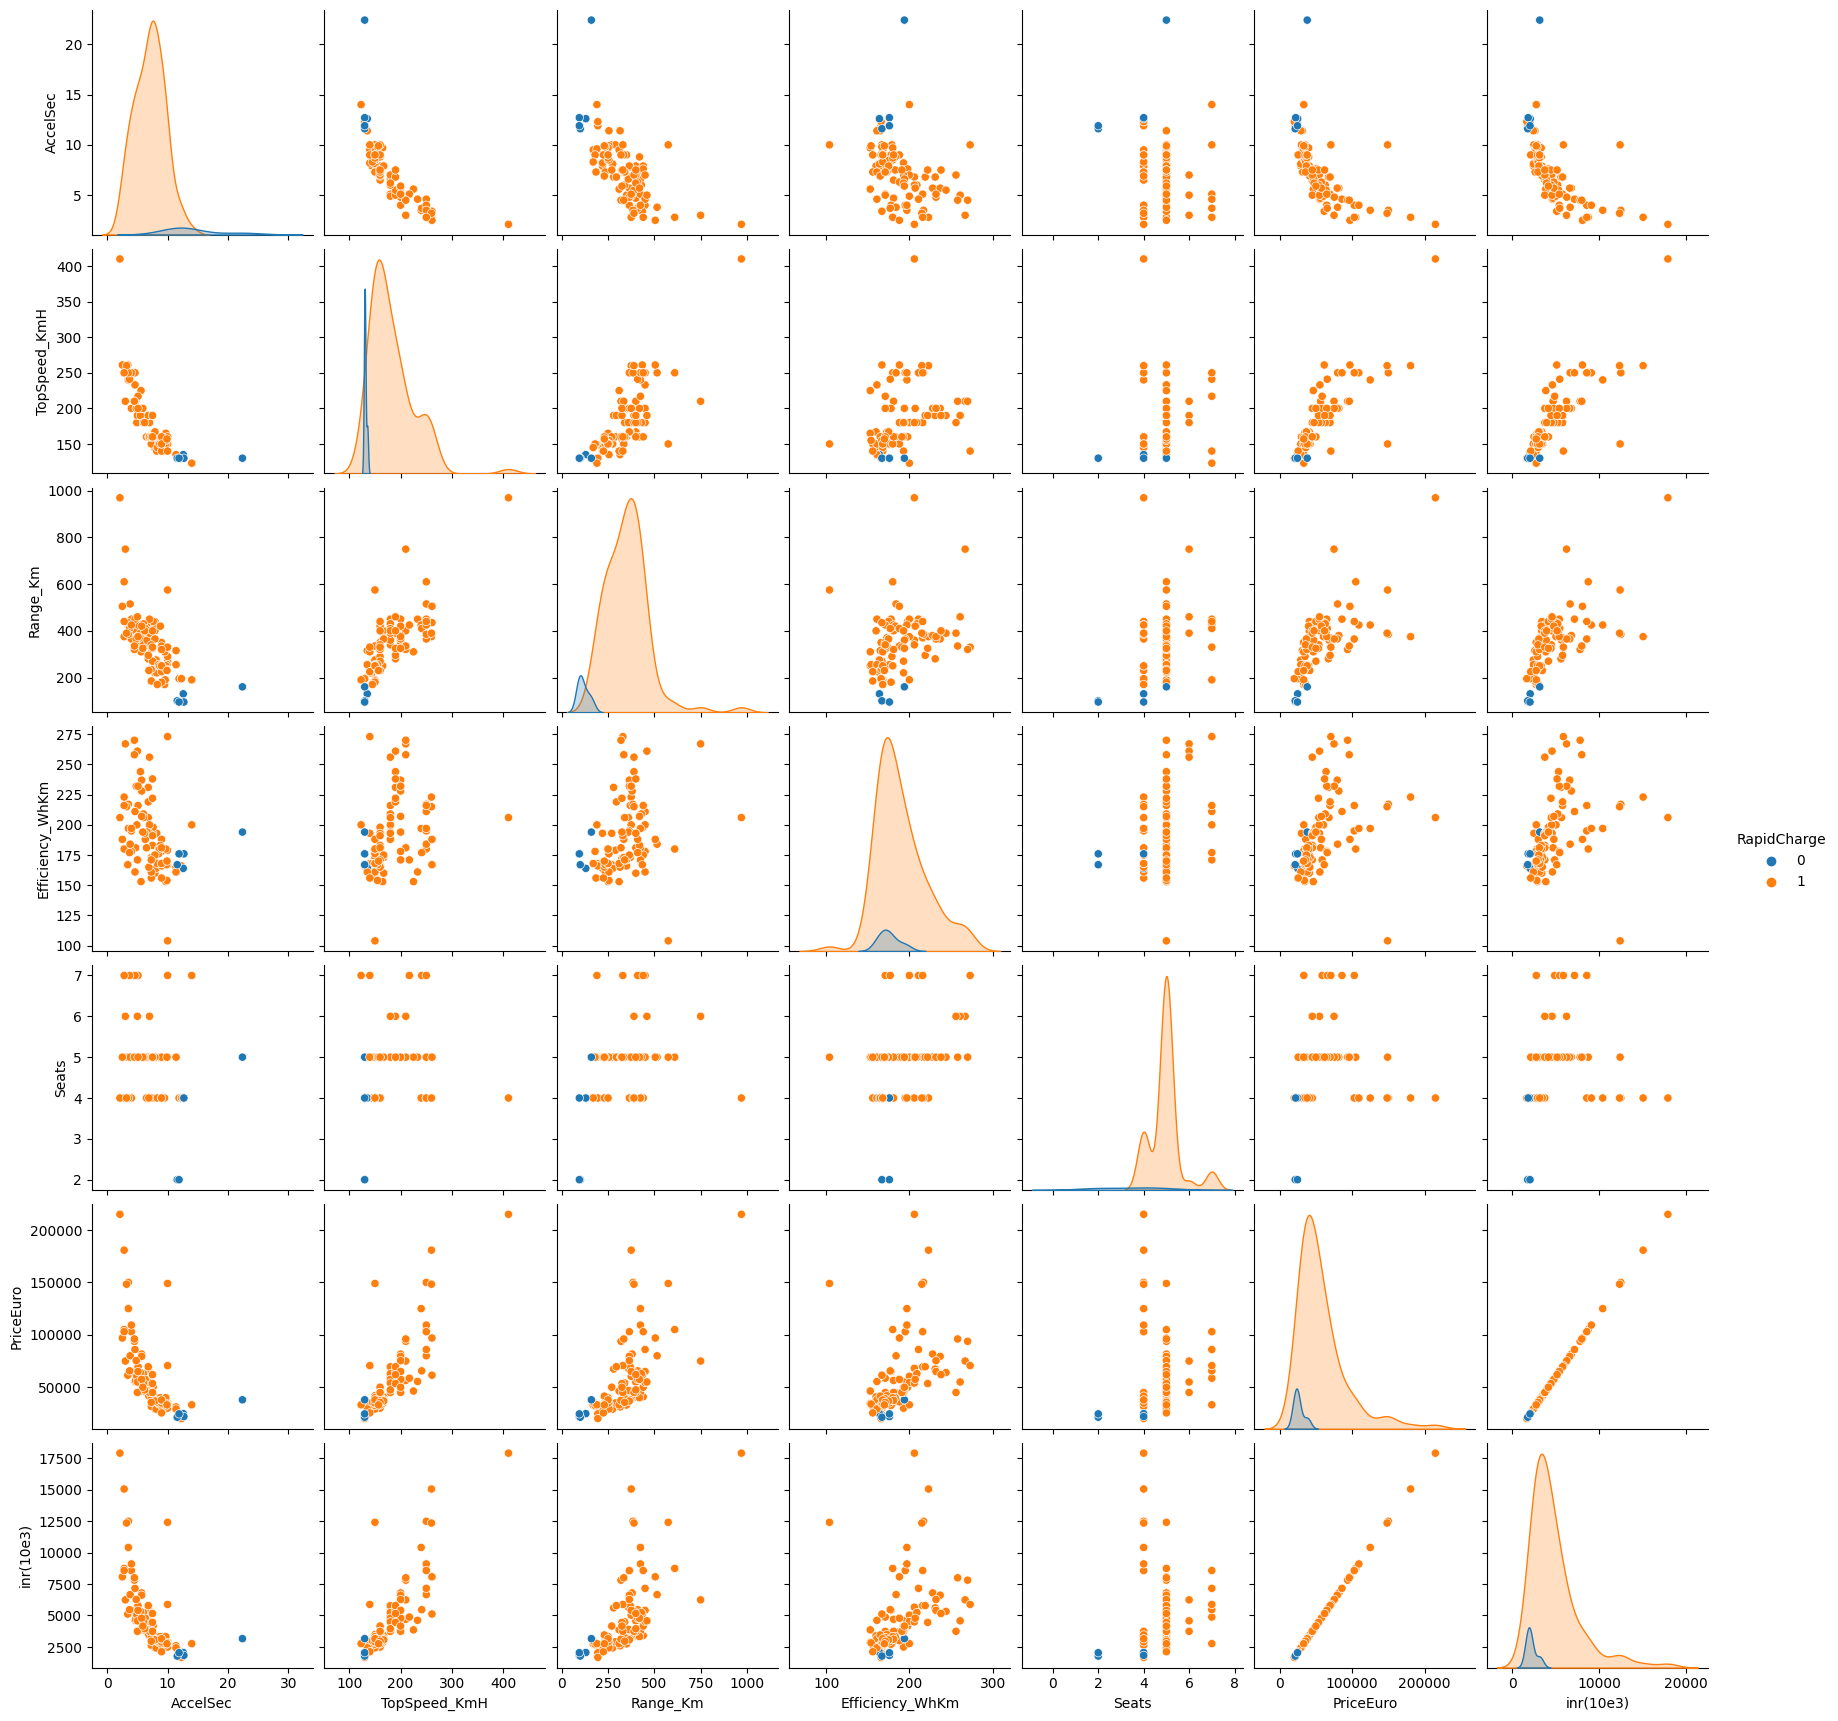

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='RapidCharge')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

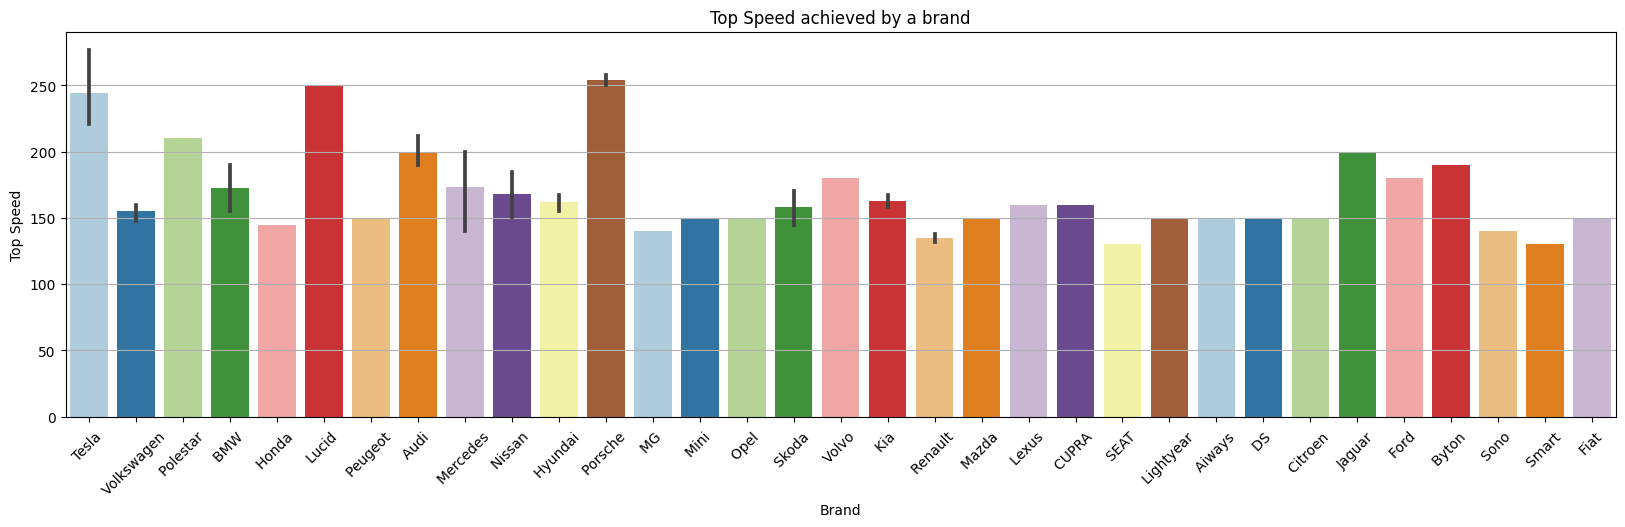

In [ ]:
import matplotlib.pyplot as plt

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

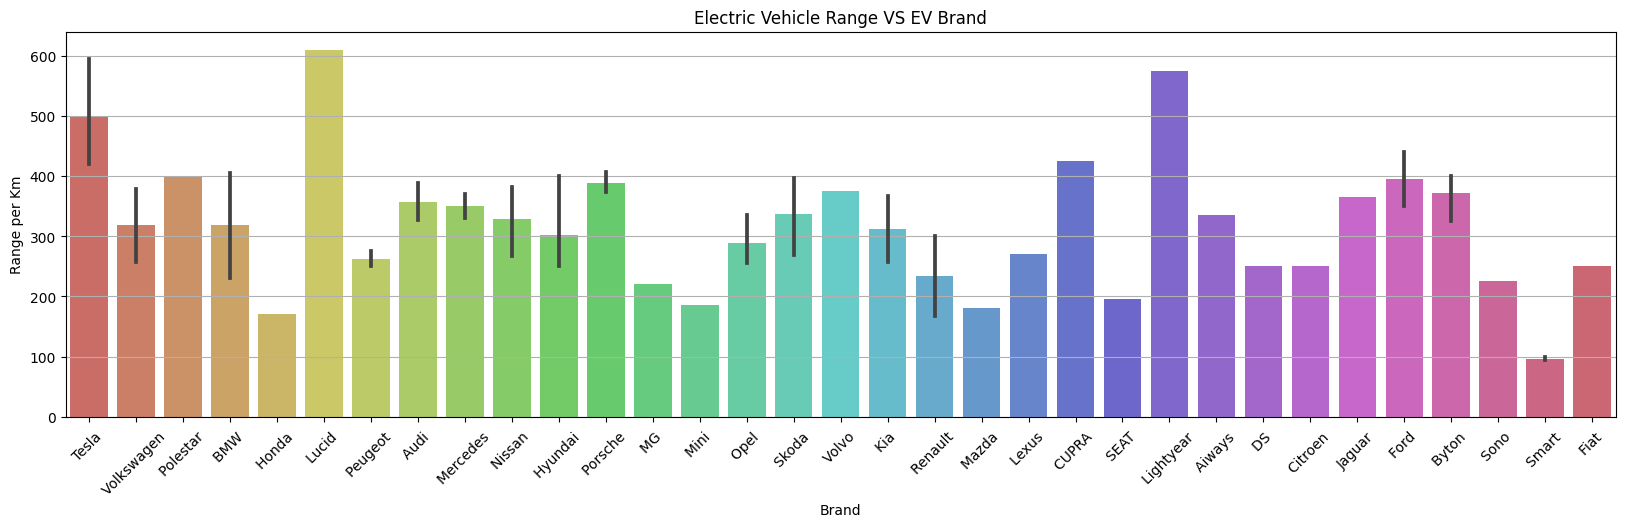

In [ ]:
#Analysis range by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

In [ ]:
range_df = df.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


In [ ]:
df = df.sort_values(by=['AccelSec'], ascending=True)
df[['Brand','Model','AccelSec']].head(n=1)

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


In [ ]:
seat_df = df.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
81,Tesla,Model X Performance,440,7


In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro', 'inr(10e3)'],
      dtype='object')

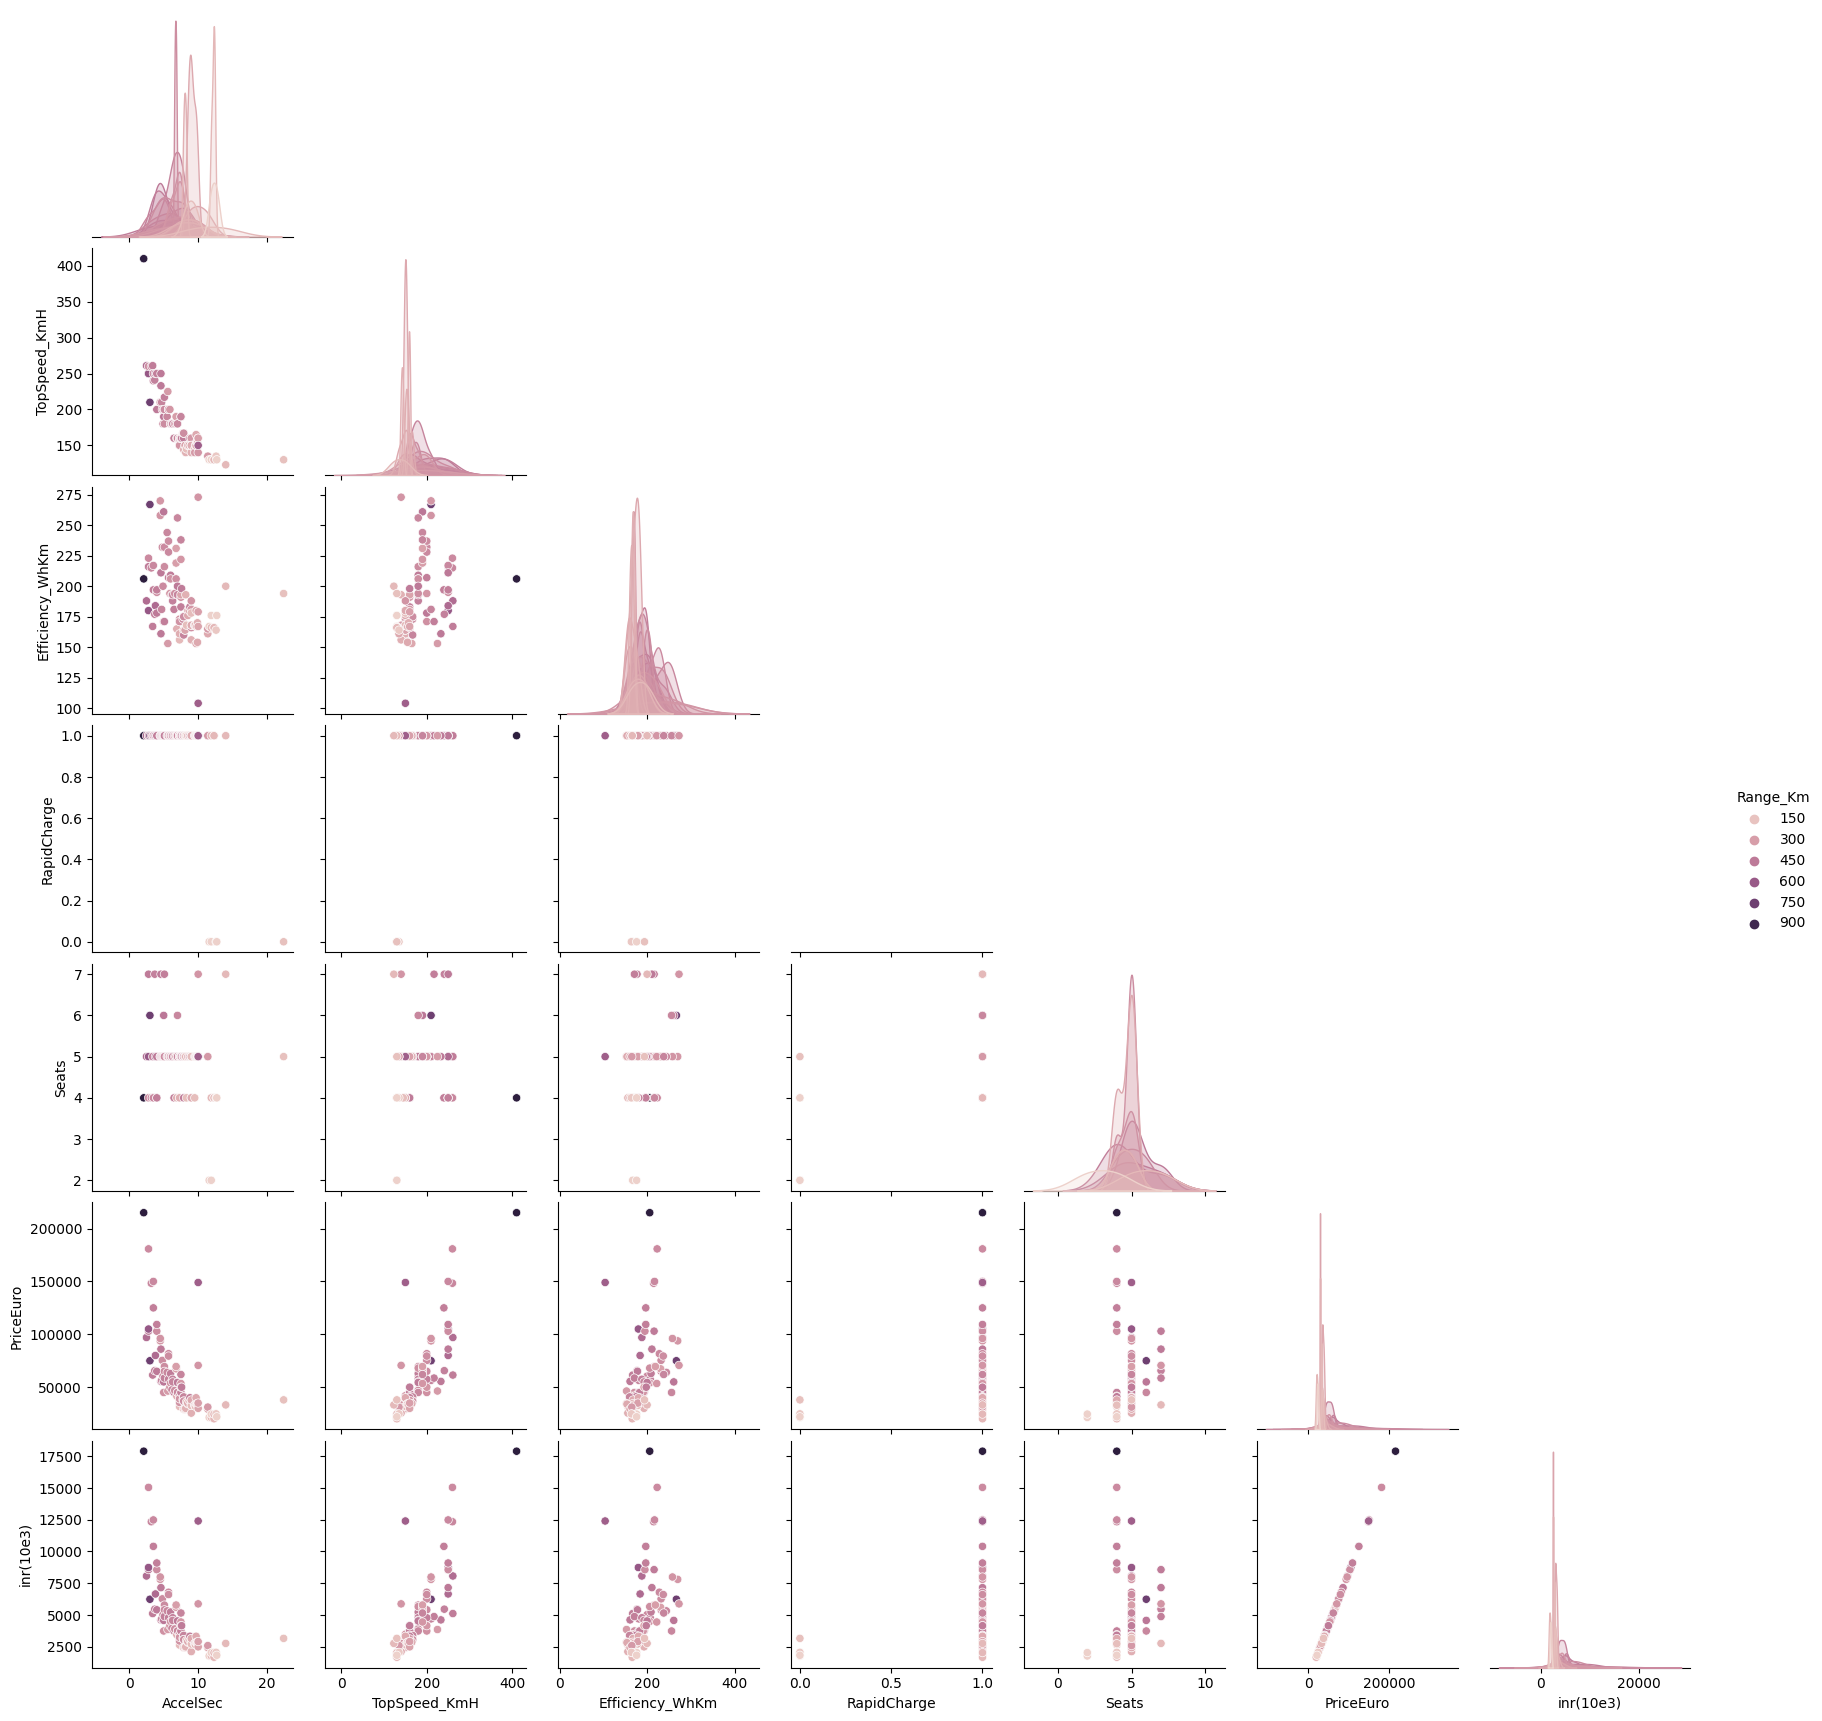

In [ ]:
#Pairplot show the correlation of the data
sns.pairplot(df,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

In [ ]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

In [ ]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand')
pio.show(fig)

Text(0.5, 1.0, 'Plug Type')

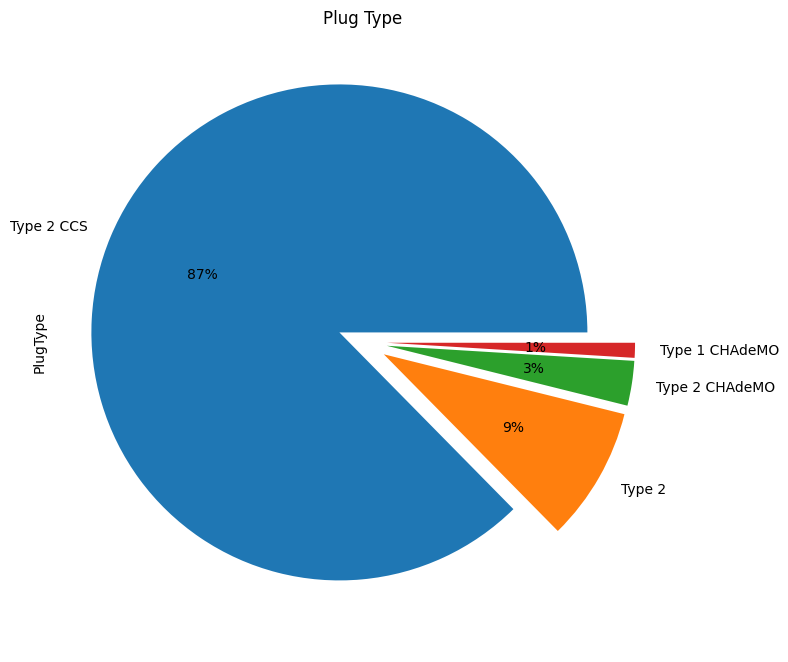

In [ ]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Body Style')

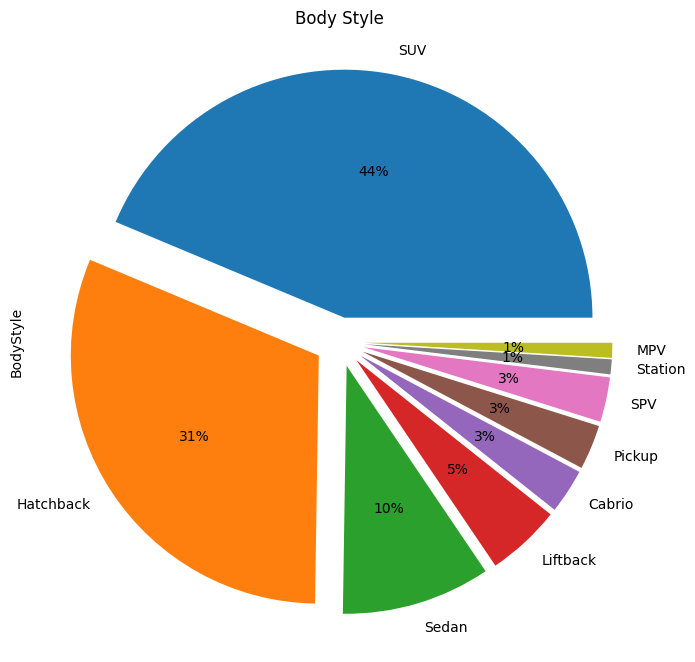

In [ ]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Segment')

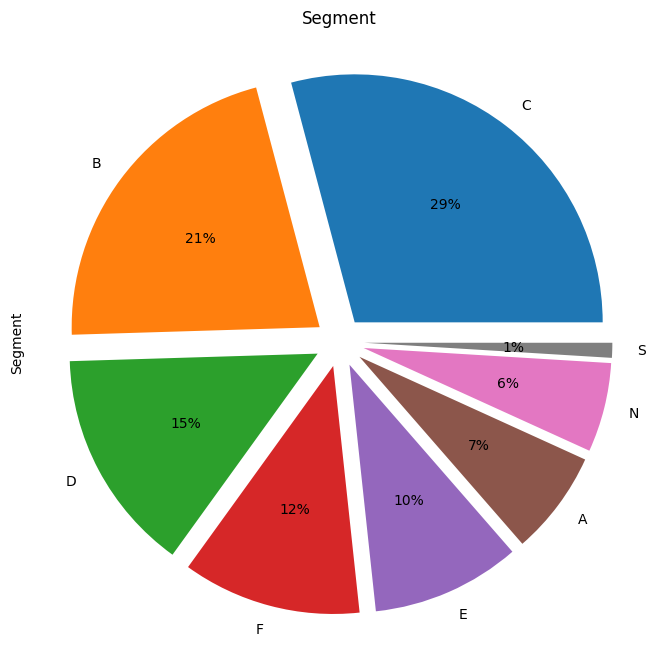

In [ ]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Seats')

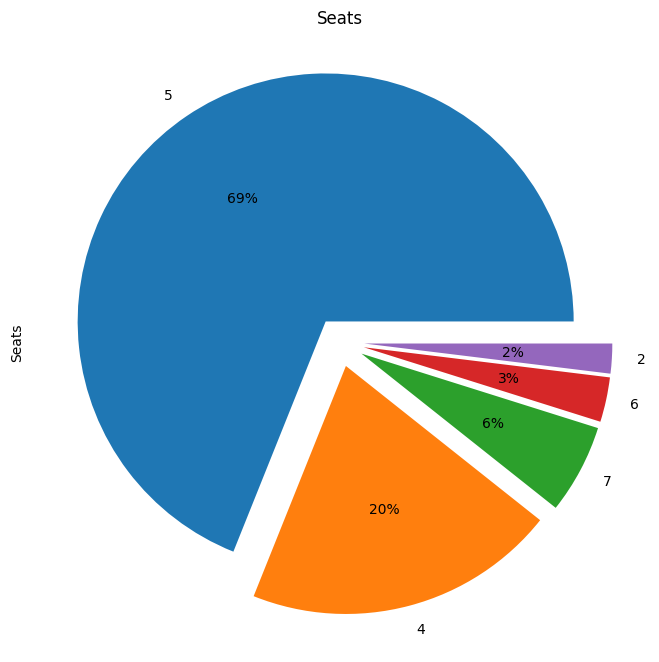

In [ ]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

In [ ]:
#Check correlation between different features
df.corr()

<ipython-input-41-82d163411333>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PriceEuro,inr(10e3),cluster_num
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.514820,-0.521011,-0.175335,-0.627174,-0.627174,-0.190142
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.251054,0.560538,0.126470,0.829057,0.829057,0.289948
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.401290,0.451495,0.300163,0.674844,0.674844,0.180186
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.105673,0.394721,0.301230,0.396705,0.396705,0.511988
RapidCharge,-0.514820,0.251054,0.401290,0.105673,1.000000,0.274797,0.423111,0.197208,0.197208,-0.473982
PowerTrain,-0.521011,0.560538,0.451495,0.394721,0.274797,1.000000,0.278882,0.561584,0.561584,0.476673
Seats,-0.175335,0.126470,0.300163,0.301230,0.423111,0.278882,1.000000,0.020920,0.020920,0.069824
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.197208,0.561584,0.020920,1.000000,1.000000,0.288815
inr(10e3),-0.627174,0.829057,0.674844,0.396705,0.197208,0.561584,0.020920,1.000000,1.000000,0.288815
cluster_num,-0.190142,0.289948,0.180186,0.511988,-0.473982,0.476673,0.069824,0.288815,0.288815,1.000000


<ipython-input-26-548ca9e70b17>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

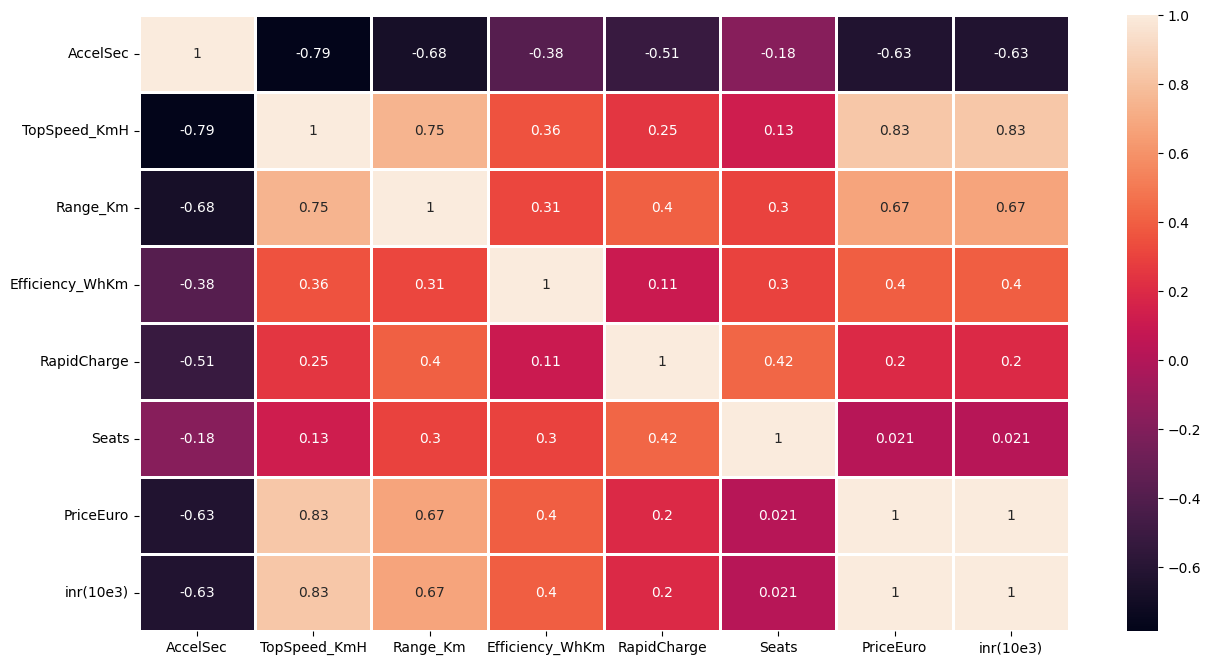

In [ ]:
#Heatmap to show the correlation of the data
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

MODEL BUILDING

In [ ]:
df['FastCharge_KmH'] = df['FastCharge_KmH'].replace('-', 0)

In [ ]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
#X=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']
# selecting features for building a model
X = df[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
t = pca.fit_transform(X_scaled)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,7.774740,3.820347,-1.066919,0.902984,1.782470,2.026297,0.196807,0.877754,-1.168988
1,2.990394,0.759728,-0.369588,-0.408030,0.334161,-0.134119,-0.074877,0.994185,-0.090111
2,3.204563,-1.152740,1.104266,-0.114819,1.039833,-0.187842,-1.097982,1.242346,0.344728
3,3.322837,0.813423,-0.722346,-0.296509,0.805604,0.202476,0.456631,0.760691,0.200850
4,3.955425,2.417234,0.371327,-0.168104,-0.872066,0.748932,-1.435167,-0.575402,0.582604
...,...,...,...,...,...,...,...,...,...
98,-2.744374,0.036335,-0.289711,-0.831001,-0.593404,0.671974,0.201753,-0.382816,-0.487717
99,-4.742341,2.564124,1.526276,0.400489,1.588351,-0.878552,-0.203239,0.513826,0.432071
100,-4.845600,2.465435,1.879882,0.501194,1.300045,-0.953155,-0.275843,0.390910,0.407617
101,-2.053409,-2.744705,1.548710,-0.255738,1.087578,0.748156,-0.906018,-0.434977,-0.136518


In [ ]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,7.774740,3.820347,-1.066919,0.902984,1.782470,2.026297,0.196807,0.877754,-1.168988
1,2.990394,0.759728,-0.369588,-0.408030,0.334161,-0.134119,-0.074877,0.994185,-0.090111
2,3.204563,-1.152740,1.104266,-0.114819,1.039833,-0.187842,-1.097982,1.242346,0.344728


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.397447,-0.031011,0.179865,-0.082230,0.350040,0.472969,0.011797,-0.483447,-0.471034
PC2,0.405549,0.264415,-0.047672,0.033643,0.162036,-0.126133,-0.331430,0.310427,-0.716822
PC3,0.231543,-0.085551,0.746398,0.413344,-0.413938,0.079599,0.111345,-0.076689,-0.123068
PC4,0.399297,0.020458,-0.206717,0.176308,0.088498,-0.401844,0.008998,-0.772580,0.007455
Pc5,0.385125,0.014408,-0.155945,0.235100,0.378002,0.330324,0.699128,0.174670,0.024324
PC6,0.232284,-0.535970,-0.432046,-0.094943,-0.499828,0.394542,-0.073509,-0.065641,-0.218858
PC7,0.157700,-0.716043,0.227216,0.041343,0.520667,-0.104690,-0.303065,0.123113,0.141480
PC8,0.371707,0.347725,0.071640,-0.053658,0.085589,0.555907,-0.473884,-0.110864,0.423905
PC9,0.314964,-0.016834,0.312715,-0.849290,-0.030109,-0.088355,0.258724,-0.069914,-0.029833


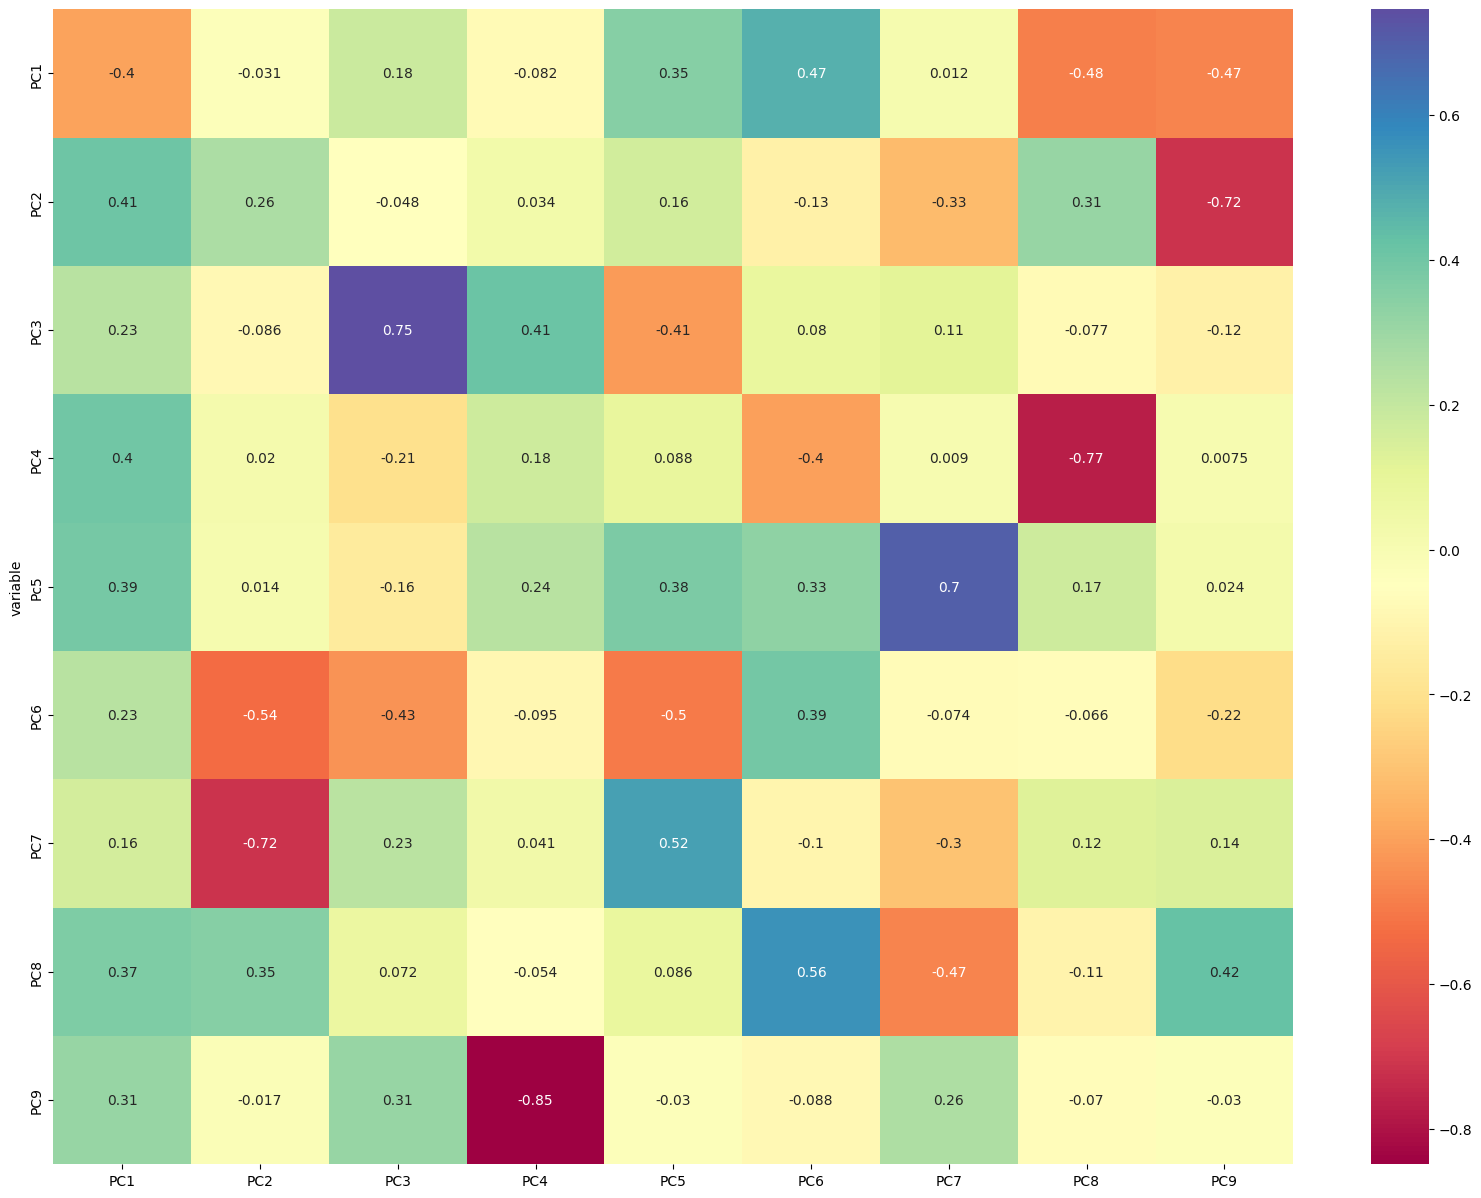

In [ ]:
#Correlation matrix plot for loadings
import seaborn as sb
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

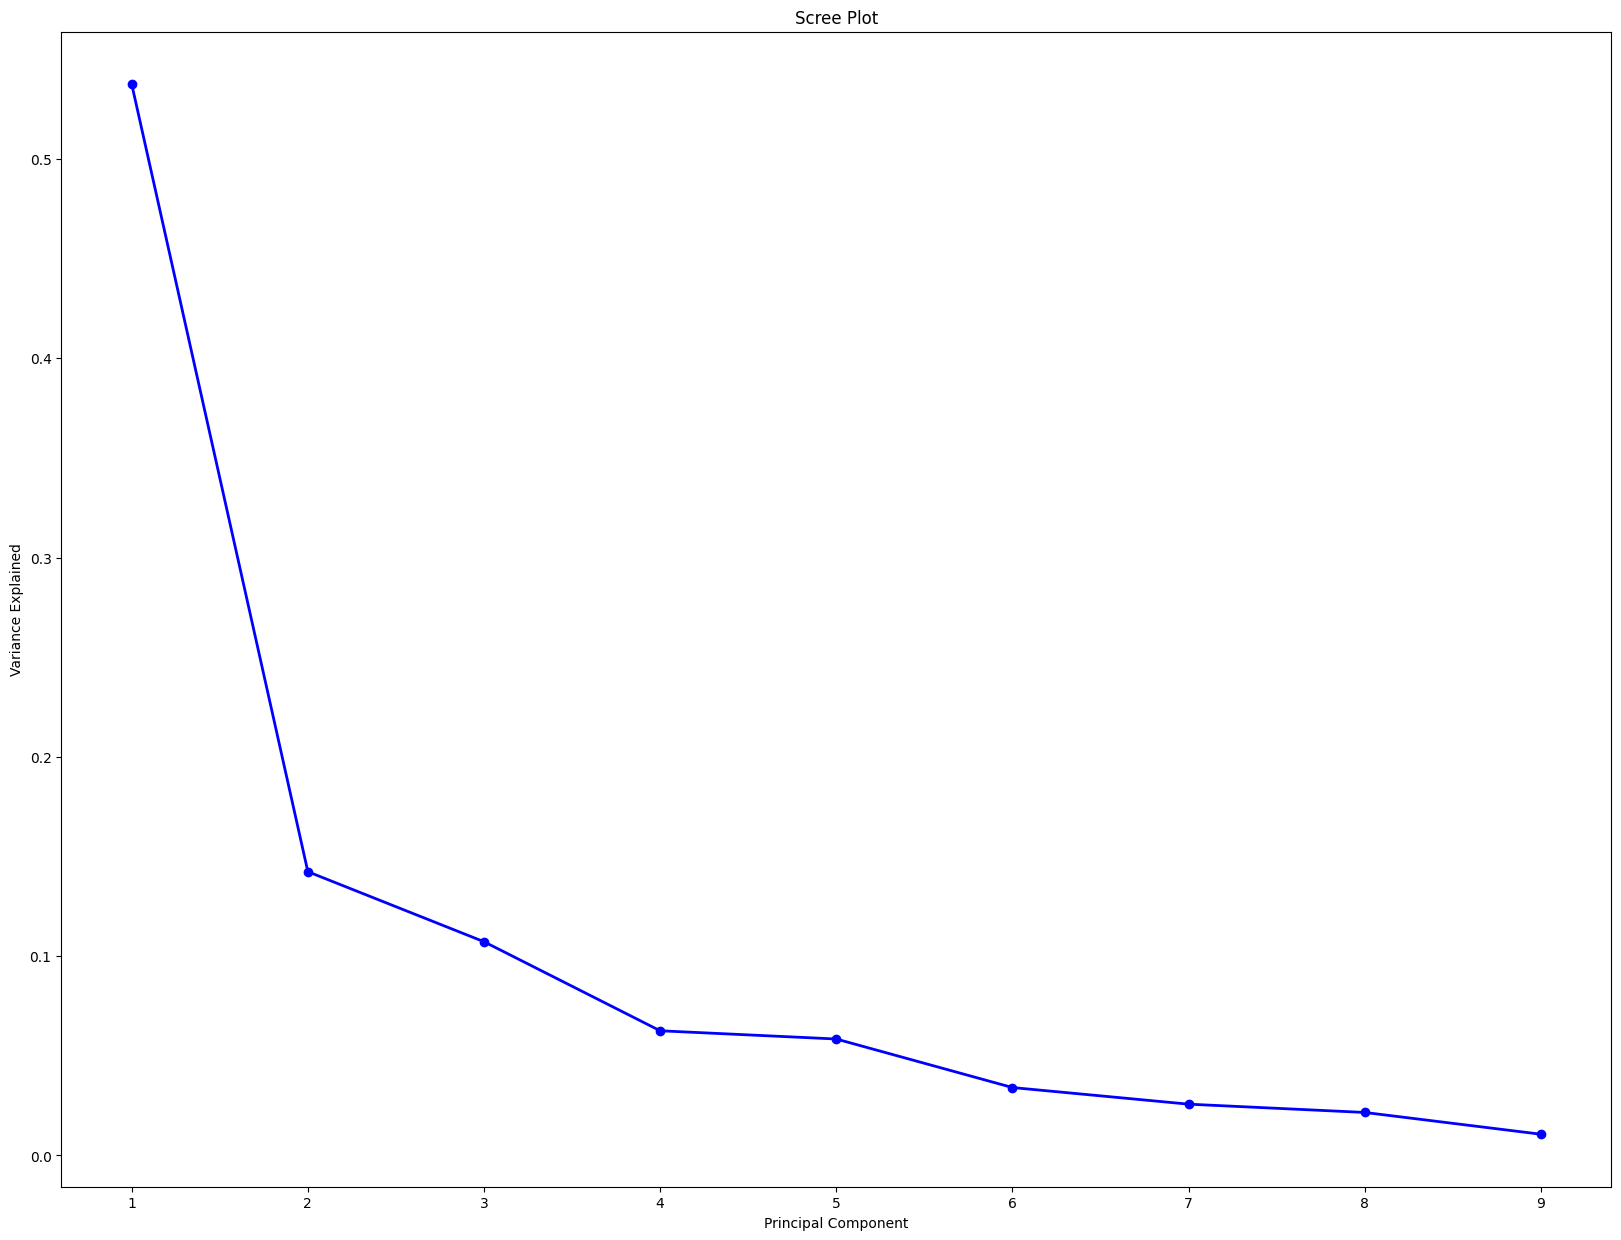

In [ ]:
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

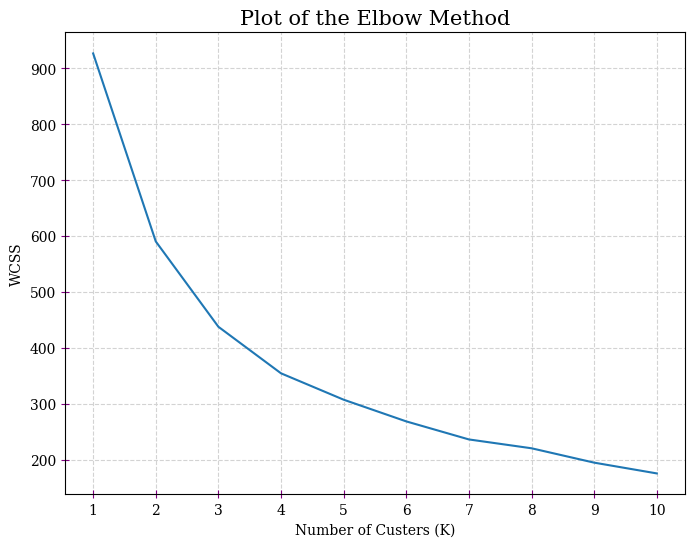

In [ ]:
from sklearn.cluster import KMeans

# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(t)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

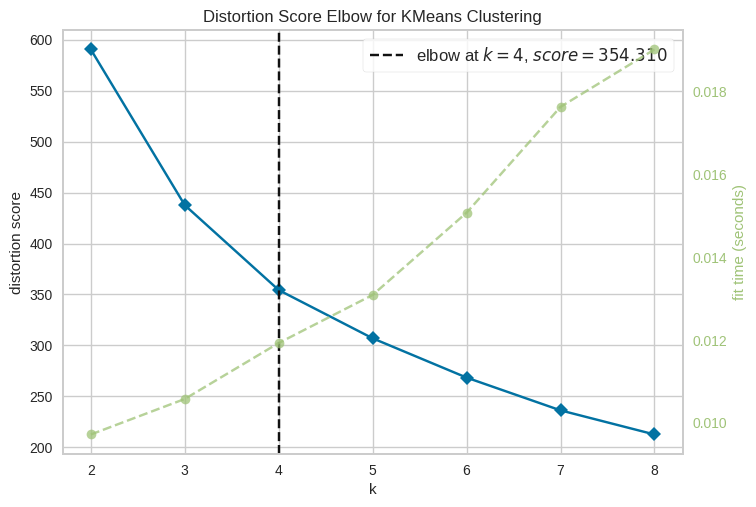

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

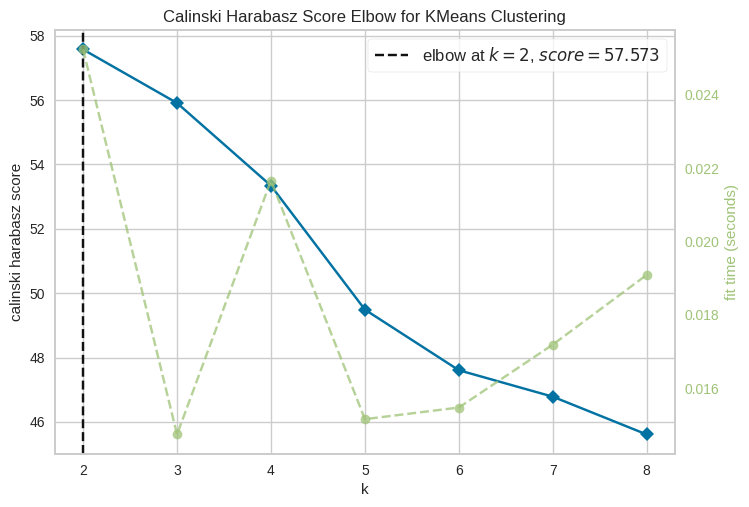

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 3 0 3 0 0 3 3 0 3]
354.39395474987884
4
[[-1.23430992e+00 -3.70403408e-01 -4.82363448e-01  1.16173580e-01
  -1.08521582e-01  1.29019036e-01 -5.38808634e-02  2.07345324e-02
  -4.08679052e-02]
 [ 3.26511684e+00  1.47191322e+00 -5.89099425e-01 -3.78410925e-01
   2.44107008e-01  1.52472480e-01 -2.19510712e-01 -1.78606263e-01
   4.97696817e-04]
 [ 1.49512781e+00 -4.59515719e-01  7.49814953e-01 -7.56511330e-02
  -1.01196233e-01 -1.91958898e-01  1.66645529e-01  2.94044427e-02
   5.29888343e-02]
 [-4.97443663e+00  3.04020235e+00  1.84589535e+00  2.36595708e-01
   1.16330644e+00 -5.35493280e-01  7.53336157e-02  5.64018077e-02
   9.27772433e-02]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 13, 2: 32, 0: 53, 3: 5})

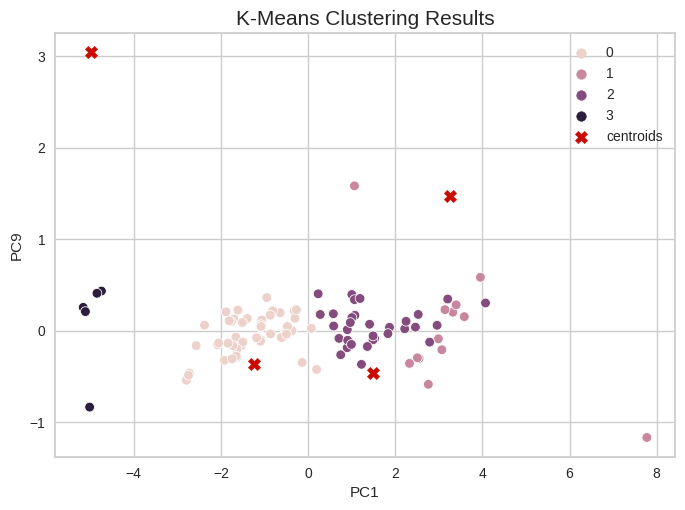

In [ ]:
#Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.title('K-Means Clustering Results' ,size=15)
plt.show()